## Importing Libraries

In [31]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## Versions of All Libraries

In [35]:
print(np.__version__)
print(scipy.__version__)
print(pd.__version__)

1.18.4
1.6.3
1.0.3


## Basics

In [2]:
x = np.arange(1, 8)  # creating an array with values ranging from 1-7 inclusive 
x

array([1, 2, 3, 4, 5, 6, 7])

In [3]:
y = 5 * x + 10  # all the elements in x multiply by 5 and add 10.
y

array([15, 20, 25, 30, 35, 40, 45])

In [4]:
# Now, let us take the summation of the numbers in the vector y and find its square root, log, and reciprocal, respectively.

Total = sum(y) #sum of all the values in y.
Total

210

In [5]:
results = [Total, np.sqrt(Total), np.log(Total), 1/Total] # store required quantities results in a list
results

[210, 14.491376746189438, 5.3471075307174685, 0.004761904761904762]

In [6]:
np.sort(results)  # sort the elements in 'results' in ascending order. Note that this is not being stored.

array([4.76190476e-03, 5.34710753e+00, 1.44913767e+01, 2.10000000e+02])

In [7]:
np.round_(np.sort(results), 3) # round the sorted results for 3 decimal places.

array([5.0000e-03, 5.3470e+00, 1.4491e+01, 2.1000e+02])

In [8]:
np.corrcoef(x,y) # provides the correlation matrix between x and y

# -- OUTPUT Interpretation-- #
#    x     y
# x  1     1
# y  1     1

array([[1., 1.],
       [1., 1.]])

In [9]:
# if you just want x's correlation with y:
np.corrcoef(x,y)[0, 1]

1.0

In [10]:
# if you just want y's correlation with x:
np.corrcoef(x,y)[1, 0]

1.0

In [11]:
len(y) # length of the vector y

7

## Basic Plots

In [12]:
fig = plt.figure(figsize=(7, 10))  # initializing a figure object to display a graph of size 7 x 10

<Figure size 504x720 with 0 Axes>

#### Plotting a simple scatter plot

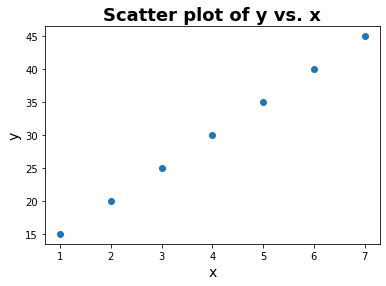

In [13]:
plt.scatter(x, y)
plt.title("Scatter plot of y vs. x", fontsize=18, fontweight='bold')  # setting the title of graph
plt.xlabel("x", fontsize=14)  # setting the x-axis label of the graph
plt.ylabel("y", fontsize=14)  # setting the y-axis label of the graph
plt.show()

#### Plotting a simple histogram

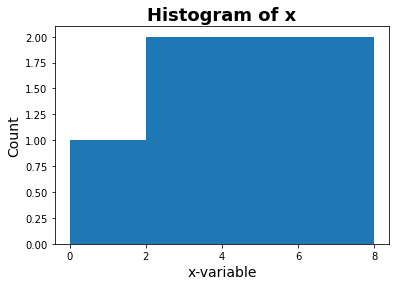

In [14]:
plt.hist(x, bins=np.arange(0, 9, 2))  # bins: [0, 2), [2, 4), [4, 6), [6, 8) 
plt.title("Histogram of x", fontsize=18, fontweight='bold')  # setting the title of graph
plt.xlabel("x-variable", fontsize=14)  # setting the x-axis label of the graph
plt.xticks(np.arange(0, 9, 2))  # setting the x-axis numerical ticks 
plt.ylabel("Count", fontsize=14)  # setting the y-axis label of the graph
plt.show()

#### Plotting a boxplot

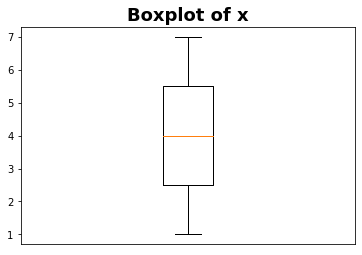

In [15]:
plt.boxplot(x)  # plotting the basic boxplot
plt.xticks([])  # setting the x-axis numerical range to be empty (default is [1])
plt.title("Boxplot of x", fontsize=18, fontweight='bold')  # setting the title of graph
plt.show()

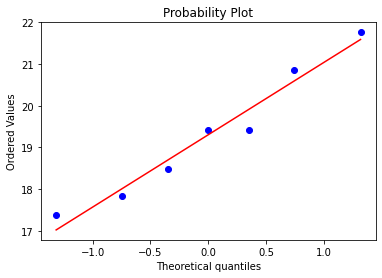

In [16]:
measurements = np.random.normal(loc=20, scale=2, size=7)
scipy.stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

## Importing Data

#### Reading data from an external text file

In [17]:
data = pd.read_csv("C:/Users/mistr/Downloads/income.txt", delimiter=' ')  # since each data point is separated with a space
data

,age,gender,salary
0,35,M,100
1,45,F,85
2,55,M,33
3,60,M,120
4,25,F,45


In [18]:
type(data)  # this is the class type of our object "data" -- "DataFrame", or "df" for short

pandas.core.frame.DataFrame

#### Extracting specific columns from a dataframe

In [19]:
income_df = data[['age', 'salary']]
income_df

,age,salary
0,35,100
1,45,85
2,55,33
3,60,120
4,25,45


#### Suppose we want to add a new row to our "income_df" dataframe: age=33 and salary=65

In [20]:
new_row = {'age': 33, 'salary': 65}
income_df = income_df.append(new_row, ignore_index=True)  # MUST ignore index!  
income_df

,age,salary
0,35,100
1,45,85
2,55,33
3,60,120
4,25,45
5,33,65


#### Adding a new column!

In [21]:
income_df['travel'] = np.array([2, 5, 6, 1, 10, 5])
income_df

,age,salary,travel
0,35,100,2
1,45,85,5
2,55,33,6
3,60,120,1
4,25,45,10
5,33,65,5


### Creating a random normal sample

In [22]:
data100 = np.random.normal(loc=10, scale=5, size=100)  #loc: mean, scale: standard deviation, size: number of samples

### 1 Sample t-test  (2-sided)

In [27]:
stats.ttest_1samp(a=data100, popmean=5)  # note that this is a 2-sided ttest

Ttest_1sampResult(statistic=8.29114581887521, pvalue=5.685578875447954e-13)

#### 1 sided

In [28]:
# say you want to get the p-value for a 1 sided result for the ttest
stats.ttest_1samp(a=data100, popmean=5).pvalue / 2  # just divide it by 2

2.842789437723977e-13